##### Dataset: "https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv"

## Q1: Load the dataset and perform basic preprocessing.

* Handle missing values

* Encode categorical features

* Split the data into training and testing sets

In [276]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [277]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [278]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending = False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [280]:
# Dropping columns with too many null values

df = df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis = 1)

In [281]:
# Fill with 'None' in Categorical columns

In [282]:
cat_cols = ['FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
    'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
    'MasVnrType']

df[cat_cols] = df[cat_cols].fillna('None')

In [283]:
# Numerical columns: Fill with 0

In [284]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)


In [285]:
# LotFrontage: Fill using median per neighborhood

In [286]:
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [287]:
# Only 1 Missing Value — Fill with Mode

In [288]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [289]:
# Identifying categorical columns

In [290]:
categorical_cols = df.select_dtypes(include = 'object').columns
categorical_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [291]:
# One hot encoding

In [292]:
df = pd.get_dummies(df, columns = categorical_cols)

In [293]:
# train-test split

In [294]:
from sklearn.model_selection import train_test_split

In [295]:
X = df.drop('SalePrice', axis = 1)
y = df['SalePrice']

In [296]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Q2: Train a Linear Regression model using scikit-learn. Report:

* Coefficients

* Intercept

* R² on test set

In [298]:
from sklearn.linear_model import LinearRegression

In [299]:
lr = LinearRegression()

In [300]:
lr.fit(X_train, y_train)

LinearRegression()

In [301]:
print(f"Intercept: {lr.intercept_}")

Intercept: -606272.1295093133


In [302]:
print(f"Coefficients: {pd.Series(lr.coef_, index = X_train.columns).sort_values(ascending = False)}")

Coefficients: RoofMatl_Metal      131557.224936
GarageQual_Ex       127155.065982
RoofMatl_WdShngl     99938.858385
RoofMatl_Tar&Grv     90929.449902
RoofMatl_Roll        90136.674594
                        ...      
Functional_Sev      -57337.929079
Condition2_RRAe     -65399.216700
GarageCond_Ex      -112904.971052
Condition2_PosN    -197502.721521
RoofMatl_ClyTile   -591936.571044
Length: 286, dtype: float64


In [303]:
from sklearn.metrics import r2_score

In [304]:
y_pred = lr.predict(X_test)

In [305]:
r2 = r2_score(y_test, y_pred)
print(f"R2-score : {r2:.4f}")

R2-score : 0.8856


## Q3: Plot the residuals to check the assumption of homoscedasticity. What do you observe?

#### Homoscedasticity ensures uniform variability of residuals across the entire spectrum of predicted values.

In [308]:
residual = y_test - y_pred

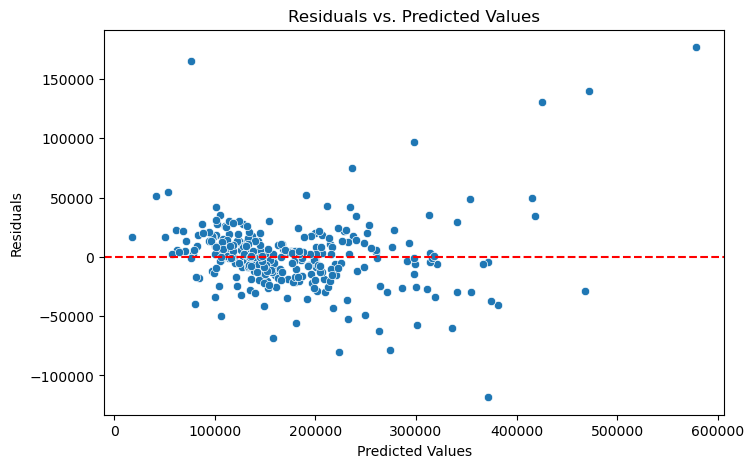

In [309]:
plt.figure(figsize = (8, 5))
sns.scatterplot(x = y_pred, y = residual)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

* The residuals are scattered around zero, which is good.
* However, there is a slight funnel shape — i.e., the spread of residuals increases with higher predicted values.

* This pattern suggests mild heteroscedasticity — the variance of errors increases for more expensive houses.

* This violates the homoscedasticity assumption of linear regression, which expects residuals to have constant variance.

## Q4: Use cross-validation (cross_val_score) to evaluate your model’s performance. Report mean and standard deviation of R² scores.

In [312]:
from sklearn.model_selection import cross_val_score

In [313]:
r2_scores = cross_val_score(lr, X, y, cv = 5, scoring = 'r2')

In [314]:
r2_mean = r2_scores.mean()
r2_std = r2_scores.std()

In [315]:
print(r2_scores ,"\n", r2_mean, '\n', r2_std, '\n')

[   0.84756504    0.81926038    0.81169216    0.8887859  -441.87386898] 
 -87.70131309821566 
 177.0862800056052 



#### The model fit was terrible for the last fold.
Possibly due to:

* Outliers

* Unusual split during cross-validation (small fold size, not representative)

# Conceptual Questions

## Q5: What is the difference between supervised, unsupervised, and reinforcement learning? Provide one real-world example for each.



| Type                       | Definition                                                                              | Output Type                           | Requires Labels?             | Real-World Example                                                  |
| -------------------------- | --------------------------------------------------------------------------------------- | ------------------------------------- | ---------------------------- | ------------------------------------------------------------------- |
| **Supervised Learning**    | The model learns from a labeled dataset — each input has a known output.                | Classification / Regression           | ✅ Yes                        | Predicting house prices based on size, location, etc.               |
| **Unsupervised Learning**  | The model learns patterns or groupings from data without known output labels.           | Clustering / Dimensionality Reduction | ❌ No                         | Customer segmentation for targeted marketing                        |
| **Reinforcement Learning** | The model learns by interacting with an environment and receiving rewards or penalties. | Policy or Action Sequence             | ❌ No (but rewards are given) | A robot learning to walk or a self-driving car learning to navigate |


Supervised: “Learn from this labeled data and make predictions.”
 e.g., Spam vs. Non-Spam Email Detection

Unsupervised: “Find patterns or group similar things on your own.”
 e.g., Grouping customers by purchasing behavior

Reinforcement: “Learn by trial and error from the environment.”
 e.g., A game-playing AI like AlphaGo

## Q6: Explain the assumptions of Linear Regression. Why is it important to check them before interpreting the model’s results?

## Ans:
Assumptions of Linear Regression:
1. Linearity
* Assumption:
    - There is a linear relationship between the independent variables and the target variable.
* Why it matters:
    - If the relationship is nonlinear, linear regression won't capture it, leading to poor predictions.
* How to check:
    - Plot actual vs predicted values or use residual plots.
 
2. Independence of Errors
* Assumption:
    - The residuals (errors) should be independent of each other.
* Why it matters:
    - If residuals are correlated (e.g., in time-series data), standard errors will be underestimated.
* How to check:
    - Use Durbin-Watson test or residual autocorrelation plots.
 
3. Homoscedasticity (Constant Variance of Errors)
* Assumption:
    - The residuals should have constant variance across all levels of predicted values.
* Why it matters:
    - If violated (called heteroscedasticity), it affects the reliability of coefficient estimates and p-values.
* How to check:
    - Plot residuals vs. predicted values. Look for a random scatter (not a funnel shape).
 
4. Normality of Residuals
* Assumption:
    - Residuals should be normally distributed.
* Why it matters:
    - Important when constructing confidence intervals and hypothesis tests for coefficients.
* How to check:
    - Use a histogram, Q-Q plot, or Shapiro-Wilk test on residuals.

5. No Multicollinearity
* Assumption:
    - Independent variables should not be highly correlated with each other.
* Why it matters:
    - Multicollinearity inflates standard errors, making it hard to interpret coefficients.
* How to check:
    - Use correlation matrix or Variance Inflation Factor (VIF).

## Q7: What does it mean when your linear regression model has a high R² but low adjusted R²?

## Ans:
R² (Coefficient of Determination):
* Measures how much variance in the target variable is explained by the model.
* Always increases (or stays the same) when you add more features — even if they’re irrelevant.

Adjusted R²:
* Adjusts R² by penalizing the number of features.
* Formula includes the number of predictors and observations.
* Only increases if the new feature improves the model more than by chance.


So, High R² but Low Adjusted R² means:
* We added too many irrelevant or weak features.

## Q8: What are the differences between Lasso and Ridge regression? In which scenarios would you prefer one over the other?

| Aspect                 | **Ridge Regression**                                     | **Lasso Regression**                                      |
| ---------------------- | -------------------------------------------------------- | --------------------------------------------------------- |
| Regularization term    | **L2 penalty**: adds `α × (sum of squared coefficients)` | **L1 penalty**: adds `α × (sum of absolute coefficients)` |
| Effect on coefficients | Shrinks them toward zero but **never exactly zero**      | Can **shrink some coefficients exactly to zero**          |
| Feature selection      | ❌ No (keeps all features)                                | ✅ Yes (performs feature selection)                        |
| When to use            | Features are **all somewhat useful** and correlated      | Many **irrelevant features**; sparse signal               |
| Output                 | Compact model, but includes all variables                | Sparse model (some variables excluded)                    |


Example Use-Cases:
*  Use Ridge When:
- Your dataset has many correlated features
- You want to keep all features but reduce their impact
- Example: Predicting stock prices where most features have some influence

* Use Lasso When:
- You suspect that only a few features matter
- You want to automatically drop unimportant variables
- Example: Genetic data, where thousands of variables are irrelevant

## Q9: What are the steps of a typical machine learning workflow from data to deployment?



## Ans:
Problem → Data → EDA → Features → Train → Evaluate → Tune → Deploy → Monitor


#### Typical Machine Learning Workflow:
1. Problem Understanding
2. Data Collection
3. Data Cleaning & Preprocessing
4. Exploratory Data Analysis (EDA)
5. Feature Engineering
6. Model Selection
7. Model Training
8. Model Evaluation
9. Model Tuning
10. Model Deployment